In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [11]:
# Load data (assuming the CSV file formating is exactly as it was downloaded from 
# Byteflies Cloud and the files are sitting in the same directory as your script or notebook)
ecg = pd.read_csv("./input-BTFH5PQXH/KRHXKXA-BTFH5PQXH-20201007-20201008/2020-10-07-101858834_ae4a7c01-7873-1c8e-c901-866517f16cb3_ECG_1.csv", names=["time", "raw"], skiprows=1)
acc = pd.read_csv("./input-BTFH5PQXH/KRHXKXA-BTFH5PQXH-20201007-20201008/2020-10-07-101858834_ae4a7c01-7873-1c8e-c901-866517f16cb3_ACC.csv", names=["time", "x", "y", "z"], skiprows=1)
gyr = pd.read_csv("./input-BTFH5PQXH/KRHXKXA-BTFH5PQXH-20201007-20201008/2020-10-07-101858834_ae4a7c01-7873-1c8e-c901-866517f16cb3_GYR.csv", names=["time", "x", "y", "z"], skiprows=1)
edr = pd.read_csv("./input-BTFH5PQXH/KRHXKXA-BTFH5PQXH-20201007-20201008/K-RHXKXA_2020-10-07-101858834_ae4a7c01-7873-1c8e-c901-866517f16cb3_EDR_1.csv", names=["time", "raw"], skiprows=1)


In [12]:
ecg.head()

,time,raw
0,0.168518,-46
1,0.172518,-2429
2,0.176518,-4181
3,0.180518,-2866
4,0.184518,-2297


In [13]:
acc.head()

,time,x,y,z
0,0.203033,-1527,2233,-3699
1,0.213033,-1176,2057,-3641
2,0.223033,-969,1842,-3495
3,0.233033,-927,1814,-2884
4,0.243033,-696,1744,-2459


In [14]:
gyr.head()

,time,x,y,z
0,0.213013,-3134,1459,1561
1,0.223013,-2527,1770,1451
2,0.233013,-540,2151,1339
3,0.243013,1074,886,778
4,0.253013,1496,-1387,-142


In [15]:
edr.head()

,time,raw
0,35.0,4.642316e+04
1,35.2,-5.543939e+05
2,35.4,-1.052769e+06
3,35.6,-1.378038e+06
4,35.8,-1.510796e+06


In [16]:
# Get the start timestamp for the Recording from the Recording detail page on the 
# Byteflies files and fill it out below (YYYY,MM,DD,HH,MM,SS,uS) [uS = microseconds, 
# i.e. File milliseconds * 1000] 
start_dt = datetime(2020,10,7,18,46,53,8225)
start_ts = start_dt.timestamp()

In [17]:
# Convert Signals to correct unit (note that this is a linear transformation and thus
# not strictly necessary)
ecg_list = ecg.keys()
acc_list = acc.keys()
gyr_list = gyr.keys()
edr_list = edr.keys()

In [19]:
for i in range(len(ecg_list)-1):
    ecg[ecg_list[i+1]] *= 1.4424  # To nV

for i in range(len(acc_list)-1):
    acc[acc_list[i+1]] *= 0.0002  # To g
    
for i in range(len(gyr_list)-1):
    gyr[gyr_list[i+1]] *= 0.0305  # To s      
    
    

In [20]:
# Convert the time values in seconds to a datetime index for easier plotting and Signal comparison
t_ns_ecg = (start_ts + ecg["time"])*1e9
ecg.index = t_ns_ecg.astype("datetime64[ns]")
ecg.drop(["time"], axis=1, inplace=True)

t_ns_acc = (start_ts + acc["time"])*1e9 
acc.index = t_ns_acc.astype("datetime64[ns]")
acc.drop(["time"], axis=1, inplace=True)

t_ns_gyr = (start_ts + gyr["time"])*1e9 
gyr.index = t_ns_gyr.astype("datetime64[ns]")
gyr.drop(["time"], axis=1, inplace=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


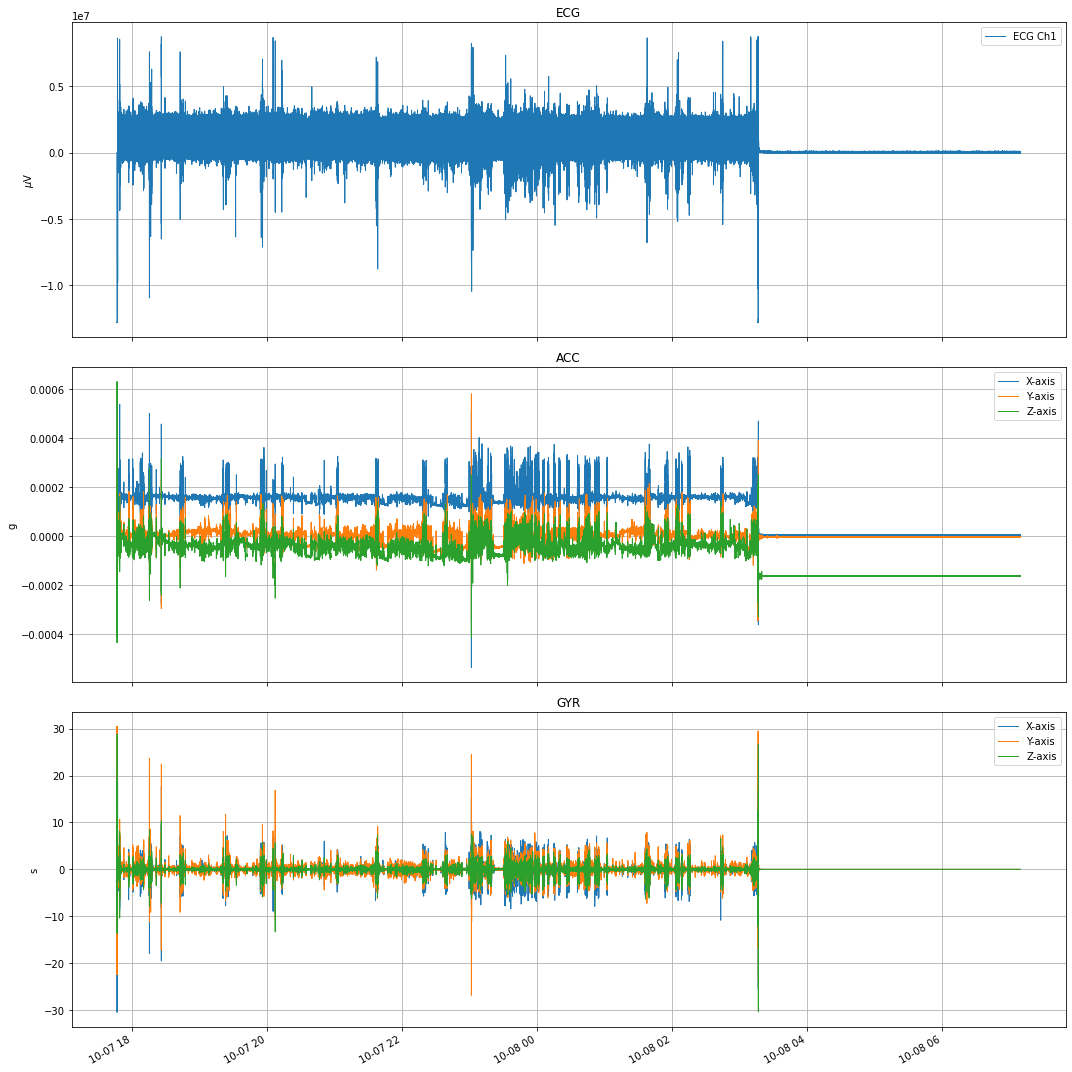

In [23]:
# Plot the data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, tight_layout=True, figsize=(15,15))
ax1.plot(ecg, lw=1)
ax1.grid()
ax1.set_title("ECG")
ax1.set_ylabel(r"$\mu$V")
ax1.legend(["ECG Ch1"], loc="best")

ax2.plot(acc, lw=1)
ax2.grid()
ax2.set_title("ACC")
ax2.set_ylabel("g")
ax2.legend(loc="best")
ax2.legend(["X-axis", "Y-axis", "Z-axis"], loc="best")

ax3.plot(gyr, lw=1)
ax3.grid()
ax3.set_title("GYR")
ax3.set_ylabel("s")
ax3.legend(loc="best")
ax3.legend(["X-axis", "Y-axis", "Z-axis"], loc="best")

fig.autofmt_xdate()
plt.show()


3 channels is perfectly normal for an ACC or GYR signal (as there are 3 axes to get data from).
For the biopotential signals (EEG, ECG, EMG, EOG); you can activate 1 biopotential channel  (if only 2 electrodes are used) or 2 biopotential channels (if 4 electrodes are used). This can be configured in configuration mode. 
